In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
df=pd.read_csv('Bank Churn.csv')

In [3]:
df.shape

(10000, 13)

In [4]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'espanio', 'fra', 'Germany', 'france', 'ger',
       'spain', 'germany', 'gernamy', 'GERMANY'], dtype=object)

In [10]:
df['Geography'].replace(to_replace=['spain','espanio'],value='Spain',inplace=True)

df['Geography'].replace(to_replace=['fra','france'],value='France',inplace=True)

df['Geography'].replace(to_replace=['ger','germany', 'gernamy', 'GERMANY'],value='Germany',inplace=True)

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [239]:
#df.to_excel('MP3_ds.xlsx',index=False)

In [12]:
df=df.drop(['CustomerId','Surname'],axis=1)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [26]:
vc=pd.DataFrame()
for col in df.columns:
        vc[col]=pd.Series(df[col].unique())

In [27]:
vc

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608,Spain,Male,41.0,1.0,83807.86,3.0,0.0,0.0,112542.58,0.0
2,502,Germany,NaN,39.0,8.0,159660.80,2.0,NaN,NaN,113931.57,NaN
3,699,NaN,NaN,43.0,7.0,125510.82,4.0,NaN,NaN,93826.63,NaN
4,850,NaN,NaN,44.0,4.0,113755.78,NaN,NaN,NaN,79084.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...
455,367,NaN,NaN,NaN,NaN,144260.50,NaN,NaN,NaN,164253.35,NaN
456,412,NaN,NaN,NaN,NaN,86605.50,NaN,NaN,NaN,7666.73,NaN
457,382,NaN,NaN,NaN,NaN,58629.97,NaN,NaN,NaN,68487.51,NaN
458,373,NaN,NaN,NaN,NaN,209767.31,NaN,NaN,NaN,199273.98,NaN


In [28]:
nvc=[]
for col in df.columns:
    nvc.append(df[col].nunique())
NVC=pd.Series(nvc,index=df.columns)

In [29]:
NVC

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [31]:
cat=[]
num=[]
for col in df.columns:
    if df[col].nunique()<5:
        cat.append(col)
    else:
        num.append(col)
cat,num        

(['Geography',
  'Gender',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'Exited'],
 ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])

# EDA

                                             |                                             | [  0%]   00:00 ->…


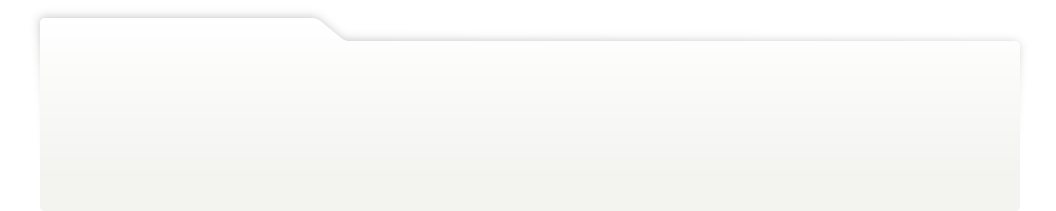
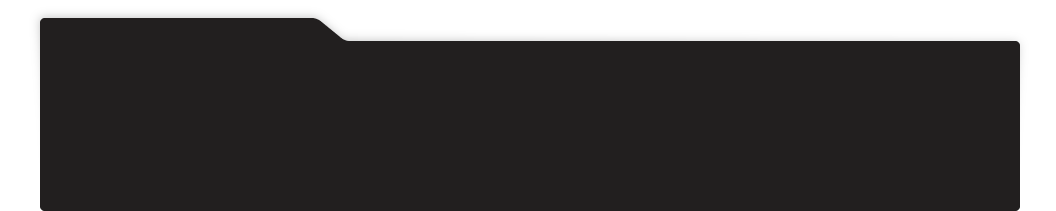
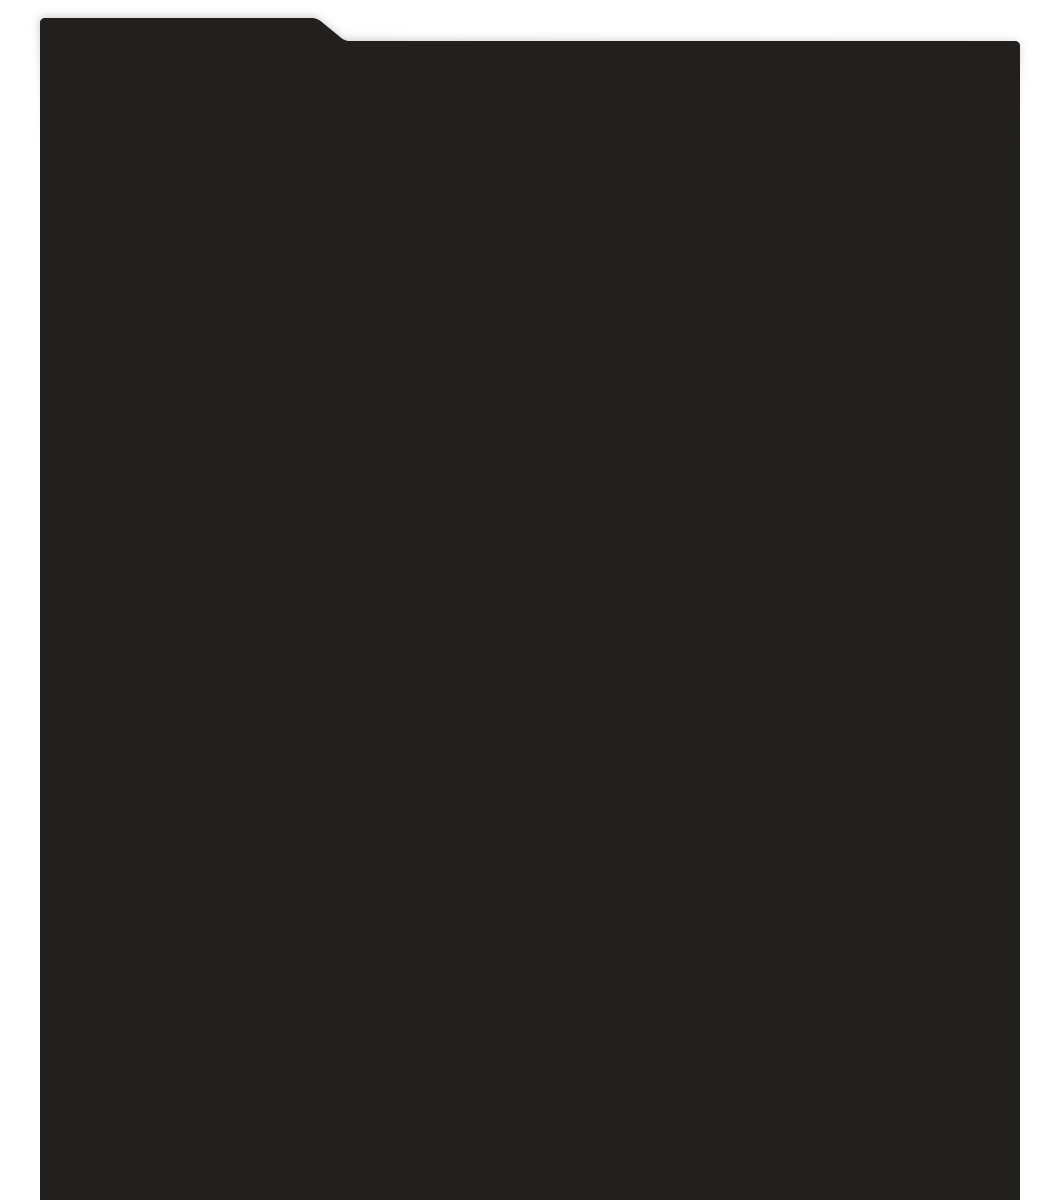
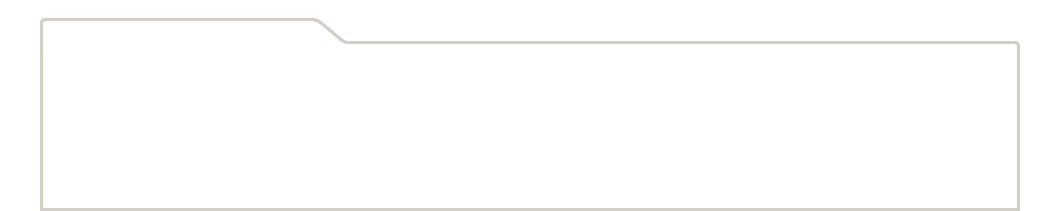
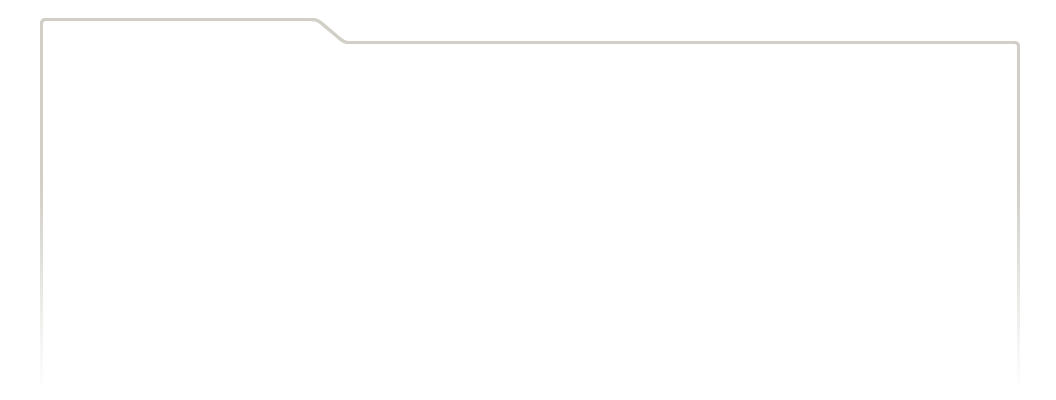
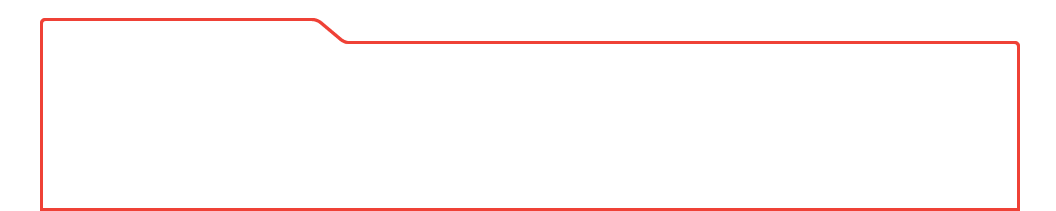
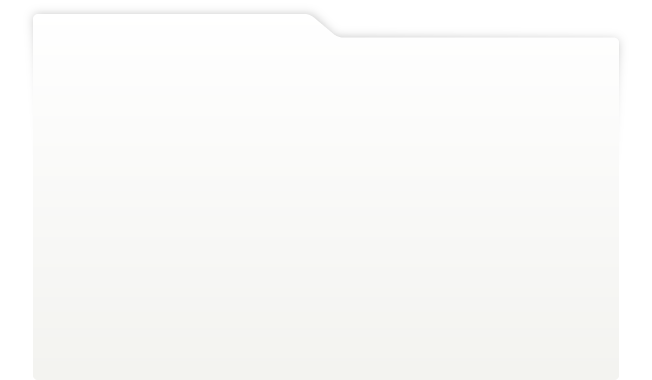
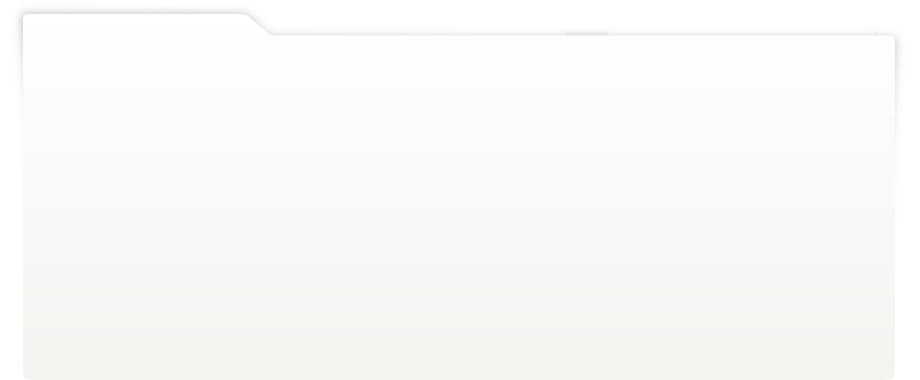
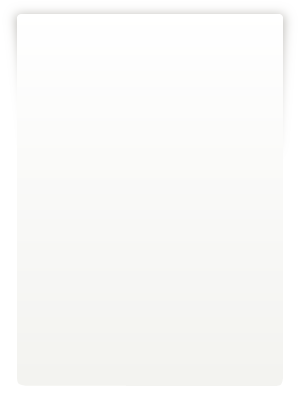
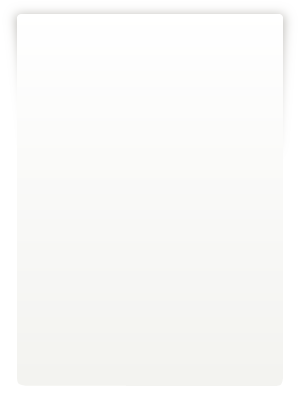
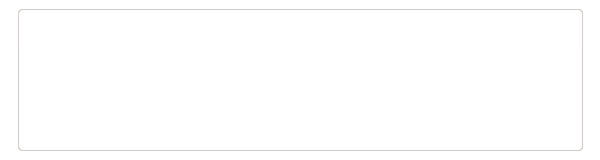
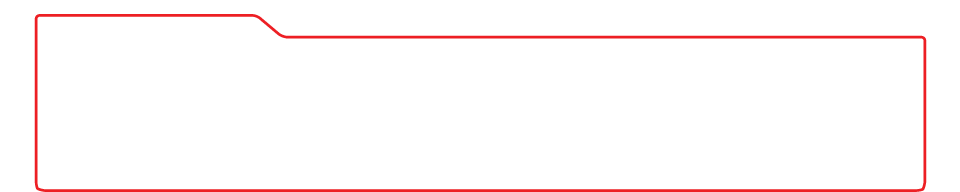
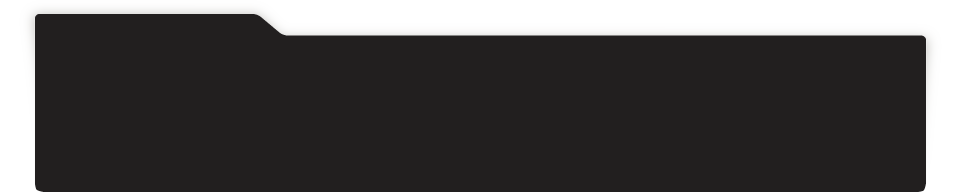
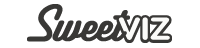
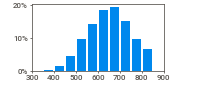
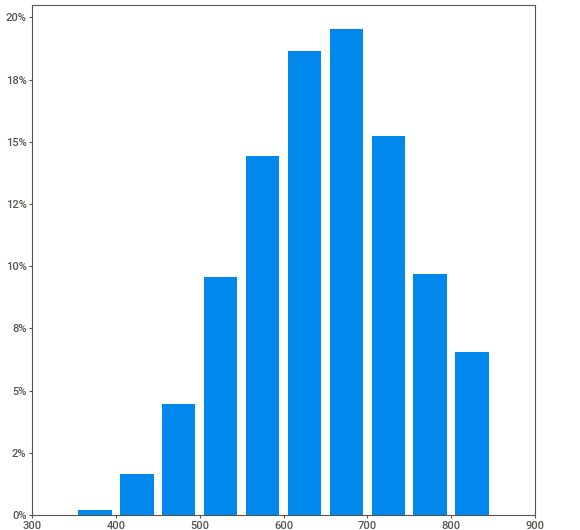
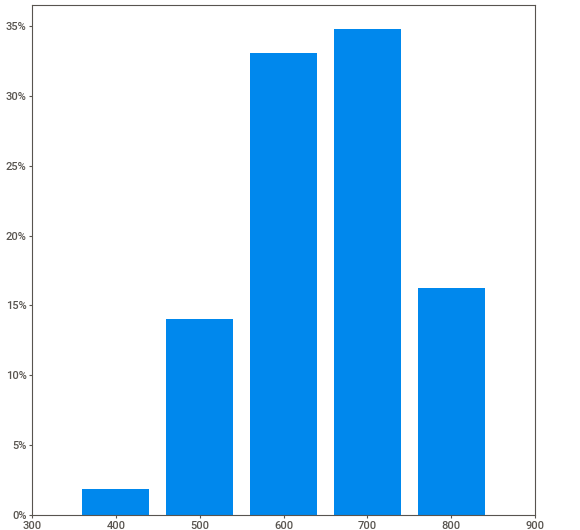
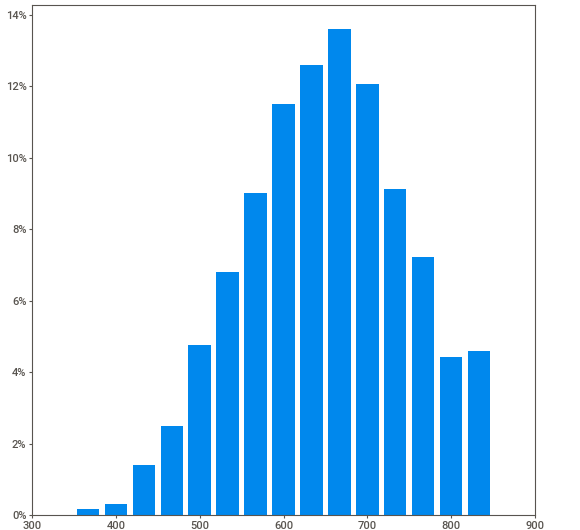
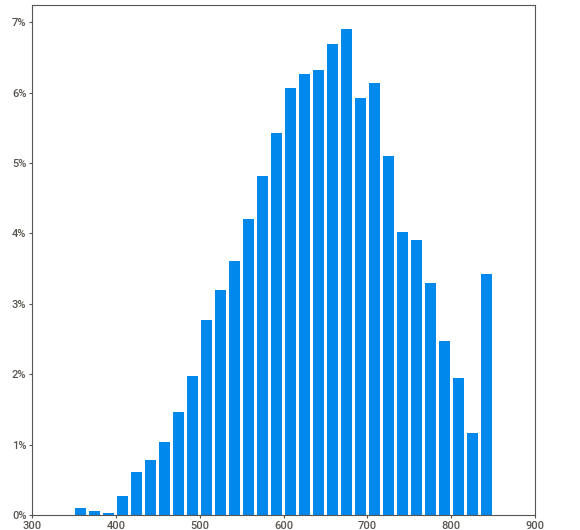
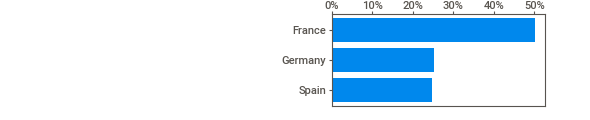
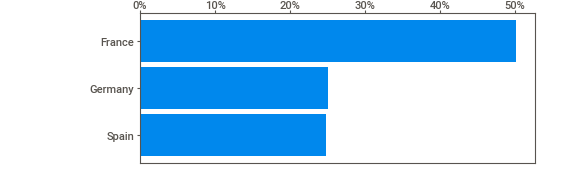
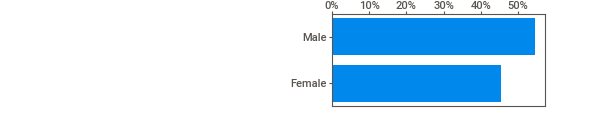
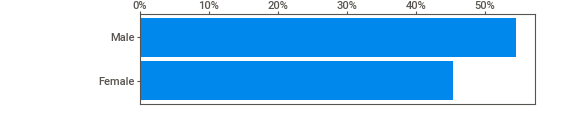
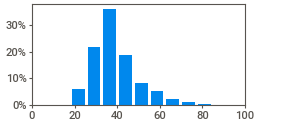
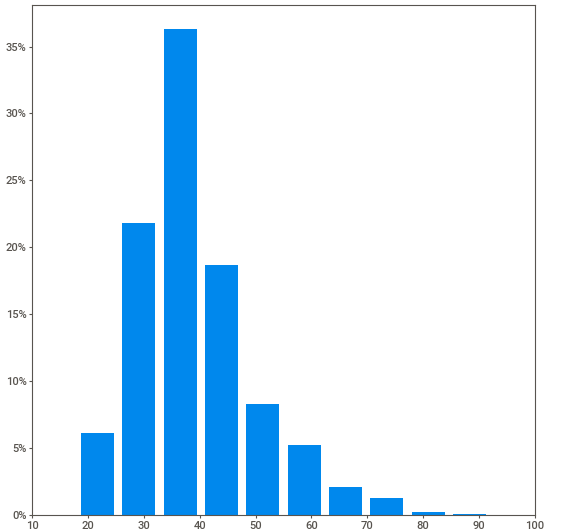
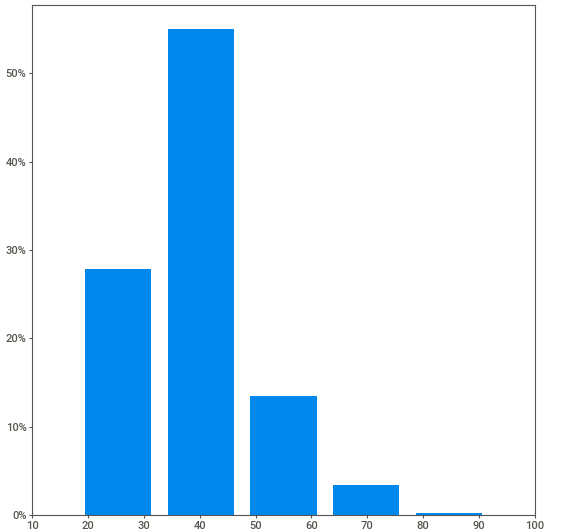
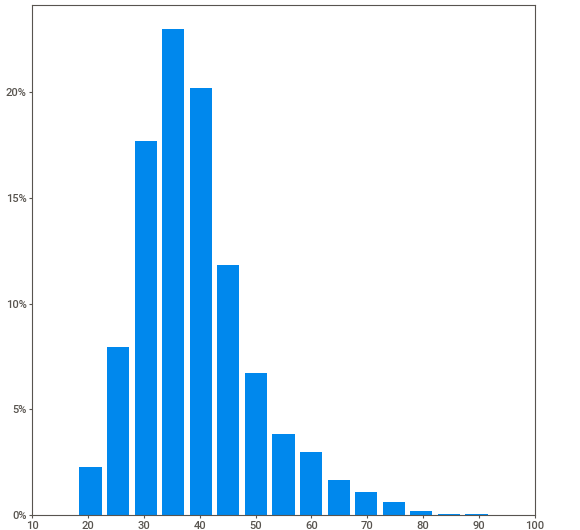
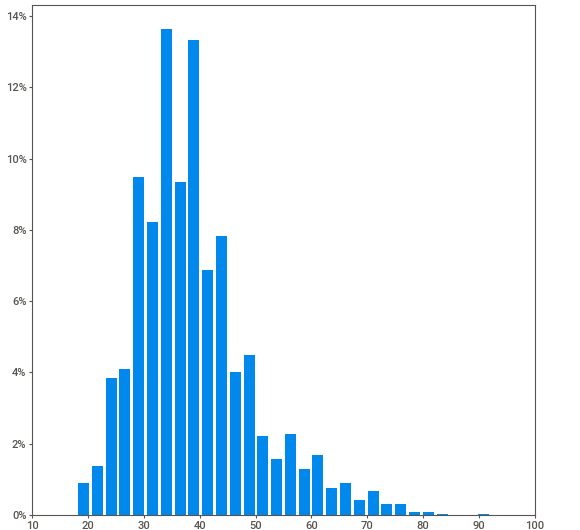
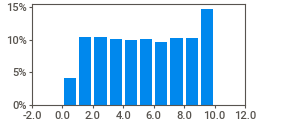
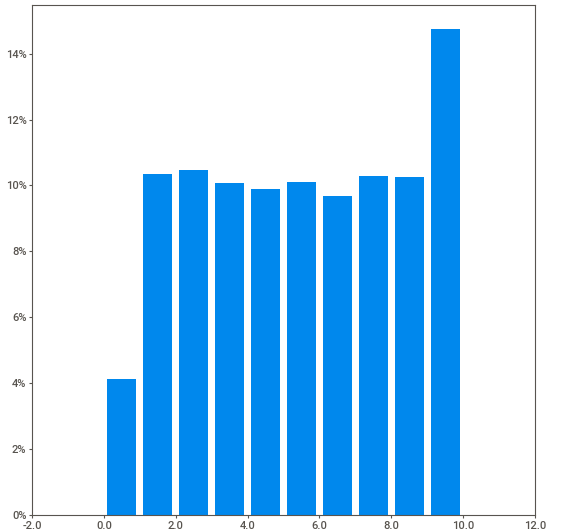
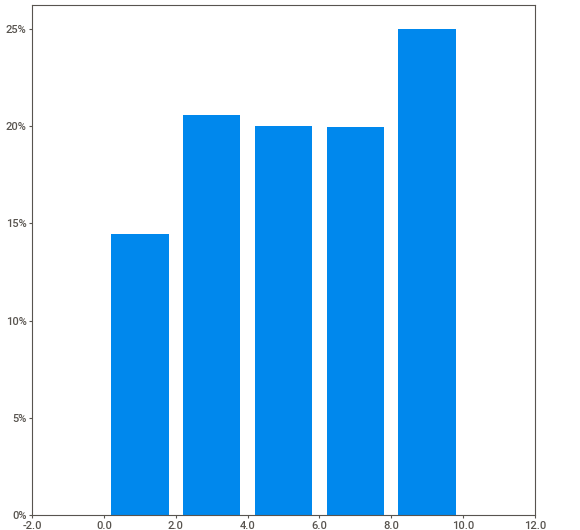
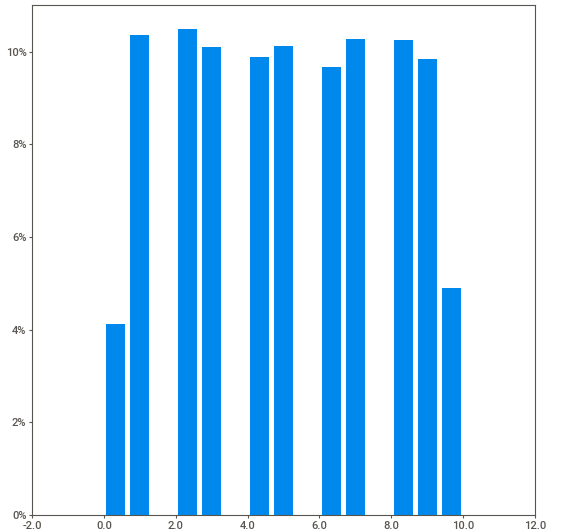
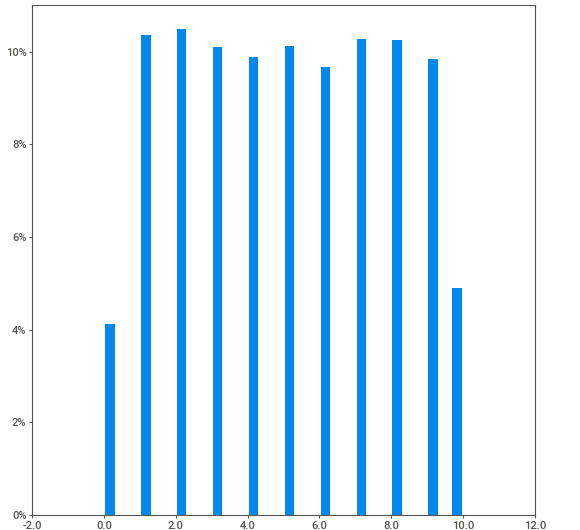
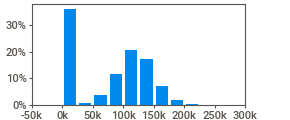
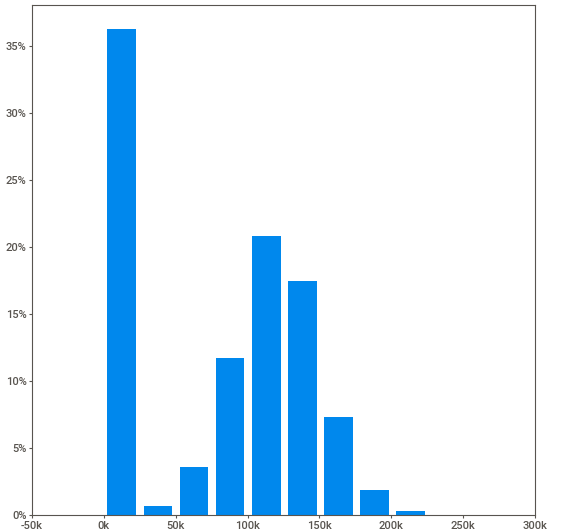
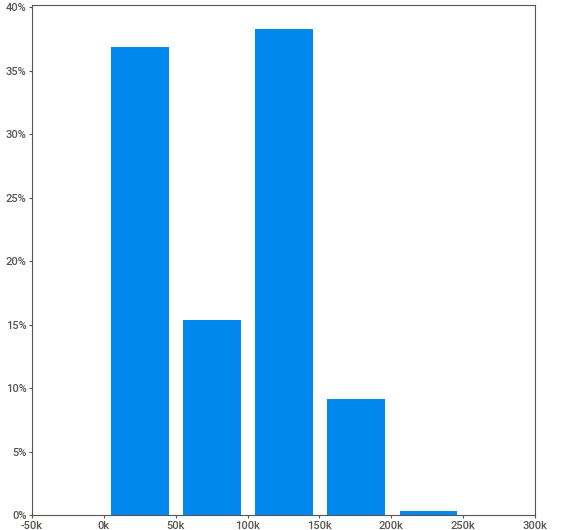
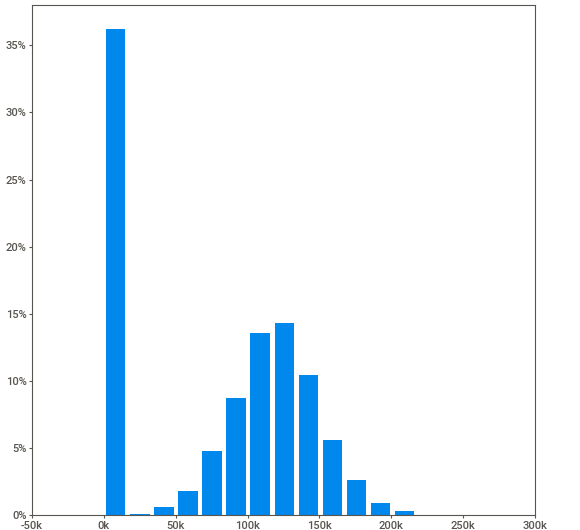
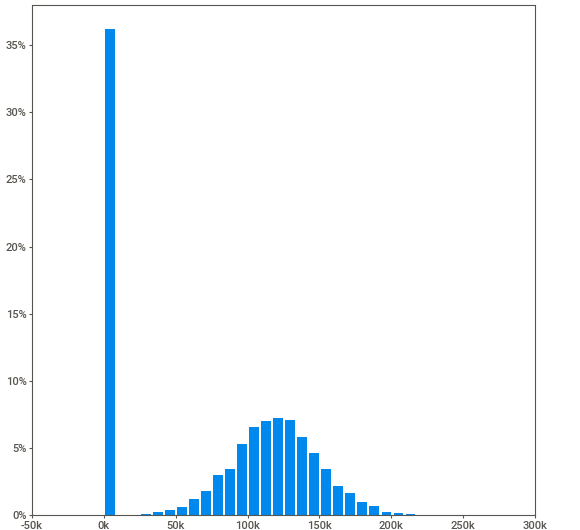
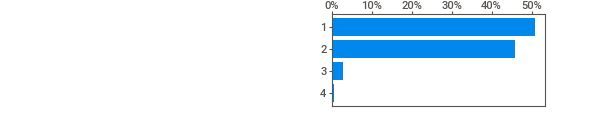
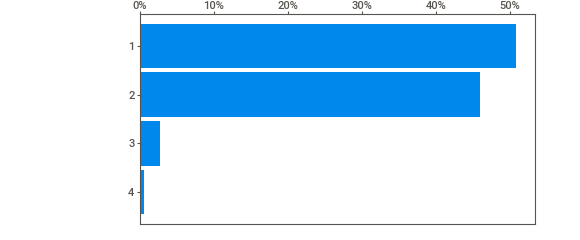
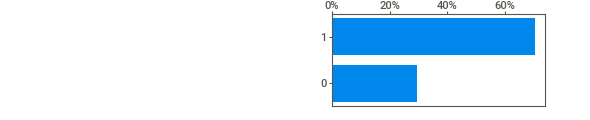
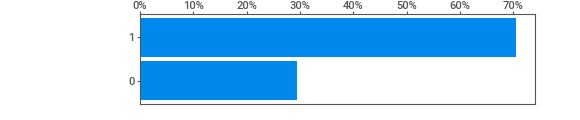
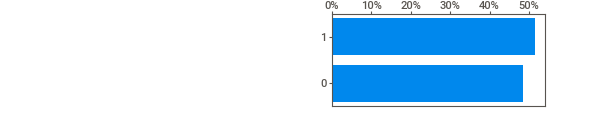
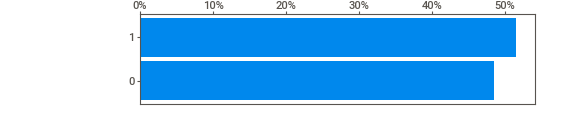
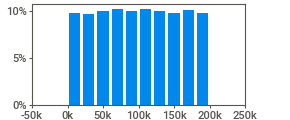
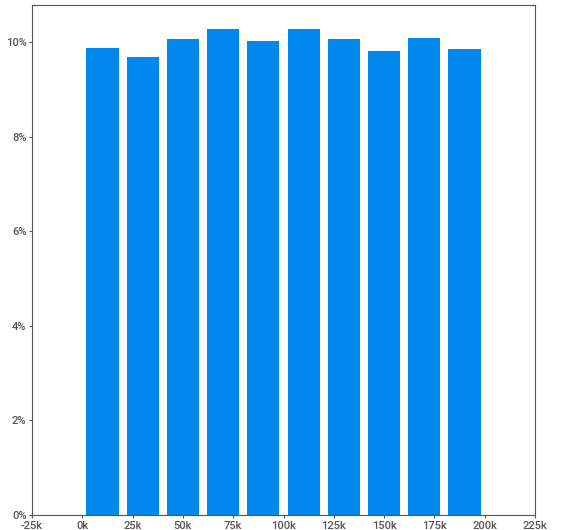
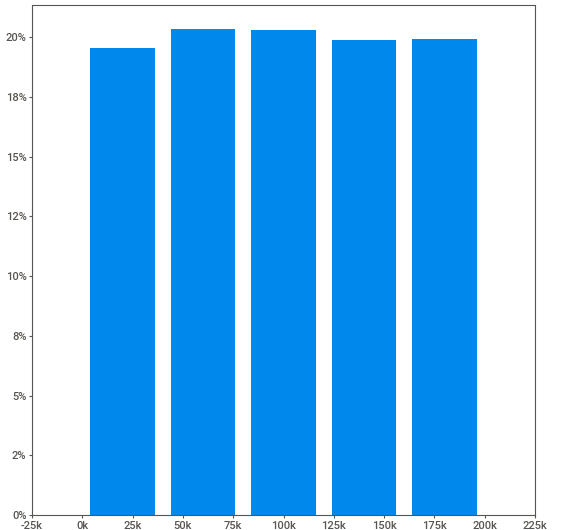
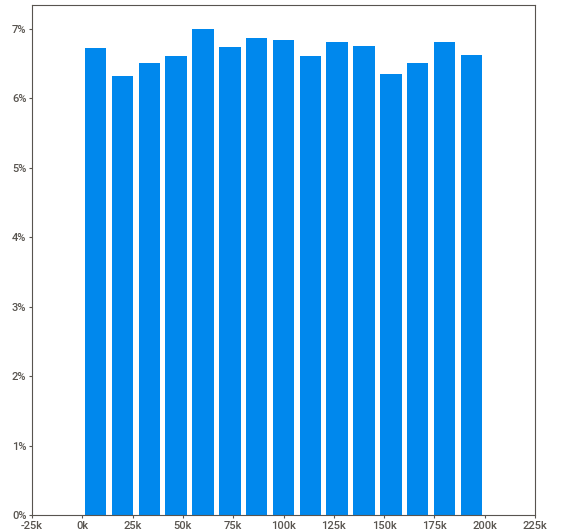
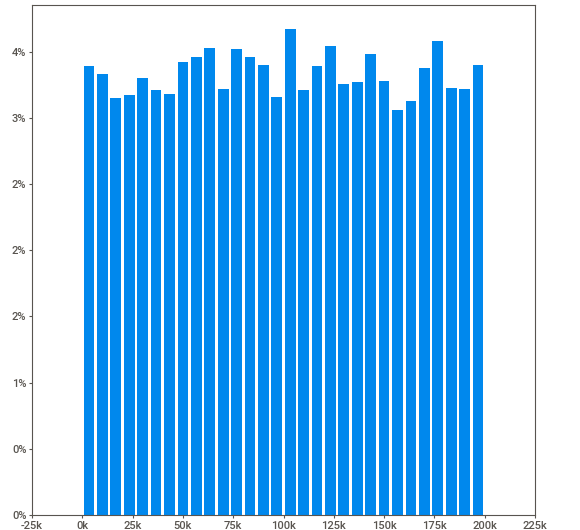
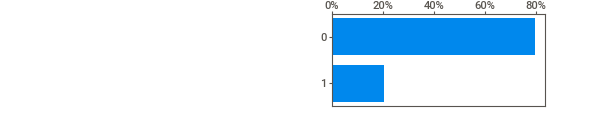
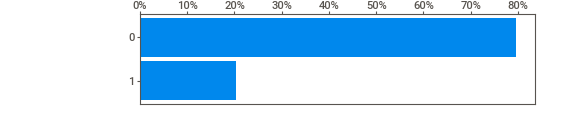
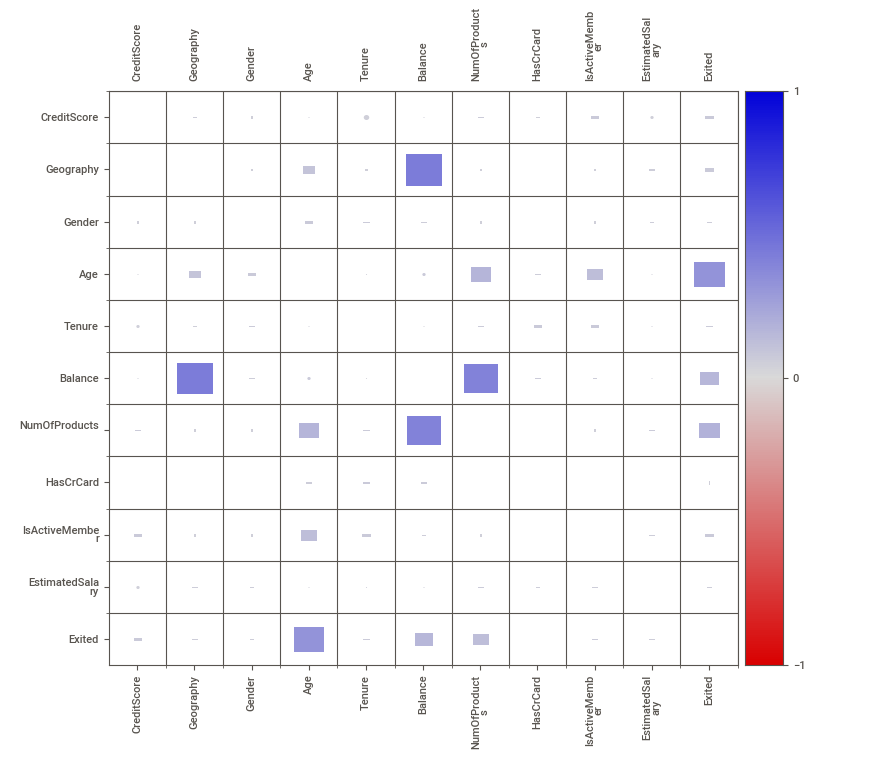
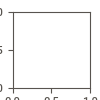

In [14]:
import sweetviz as sv

report = sv.analyze(df)


report.show_notebook(w=1000,h=500)

# Categorical Columns

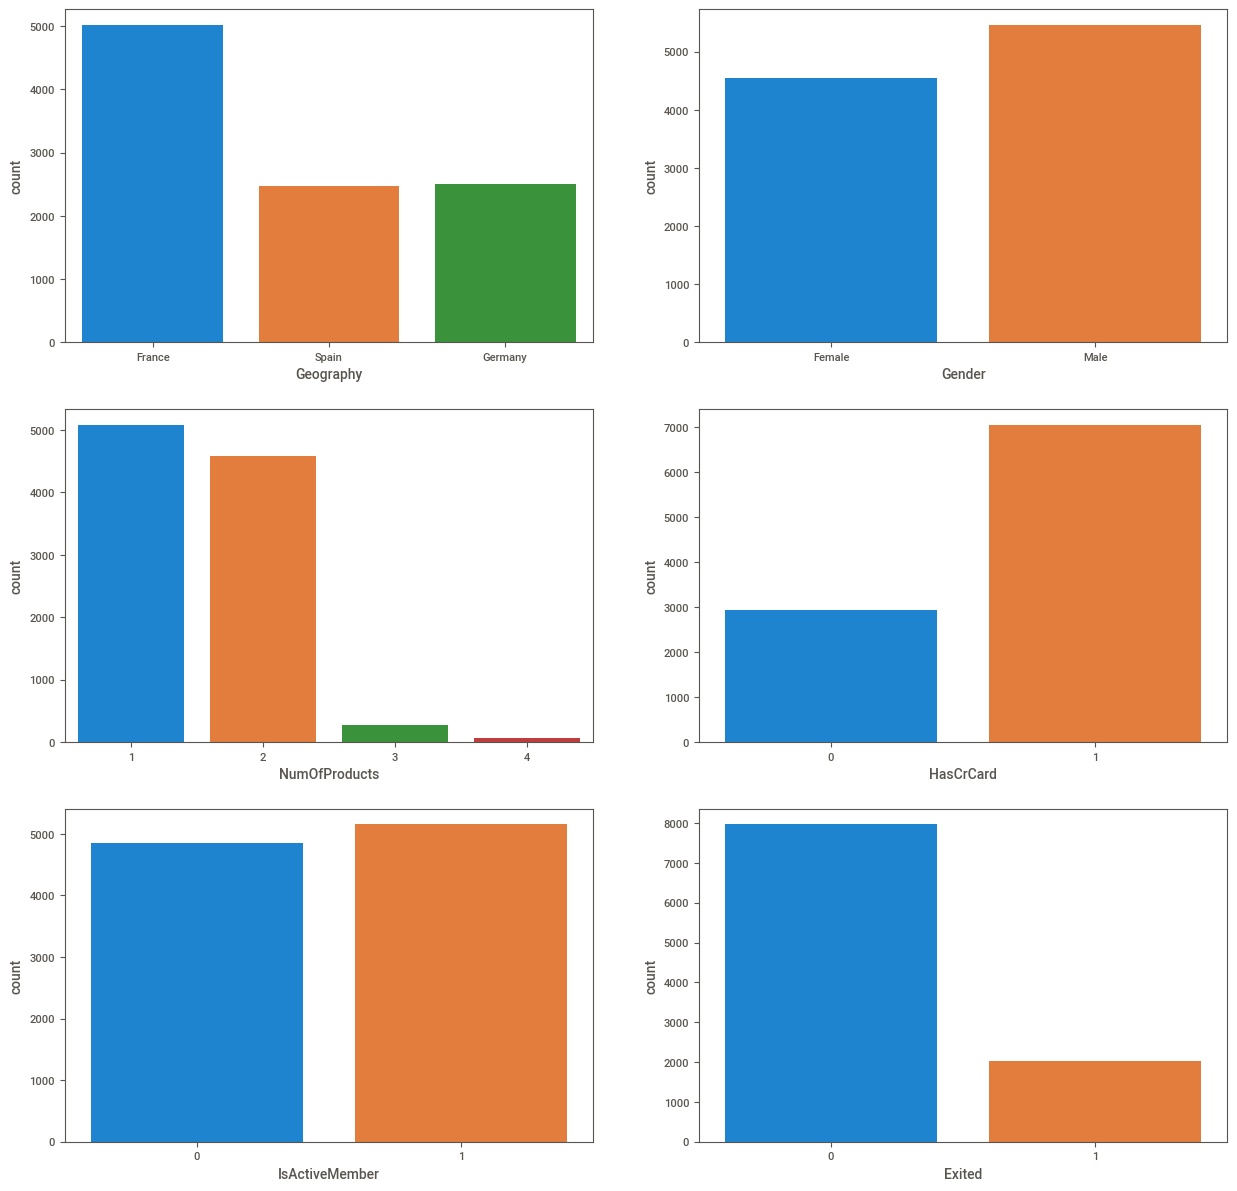

In [36]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
for col,i in zip(cat,ax.flatten()):
    sns.countplot(x=col,data=df,ax=i)
    #[i].set_title(col)
    
    

In [63]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# There is a wide imbalance in the data, with number of people not churning being very less.

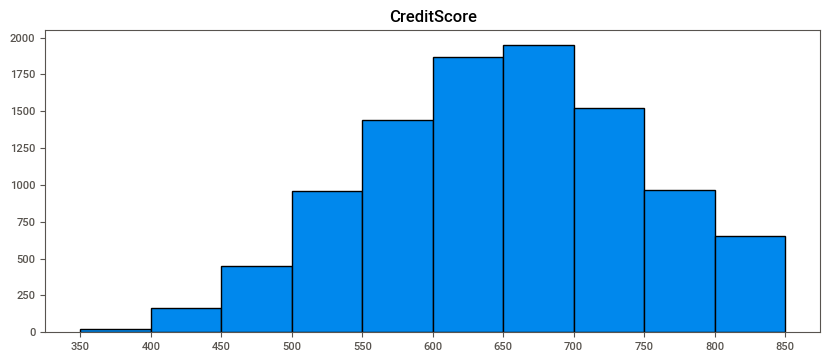

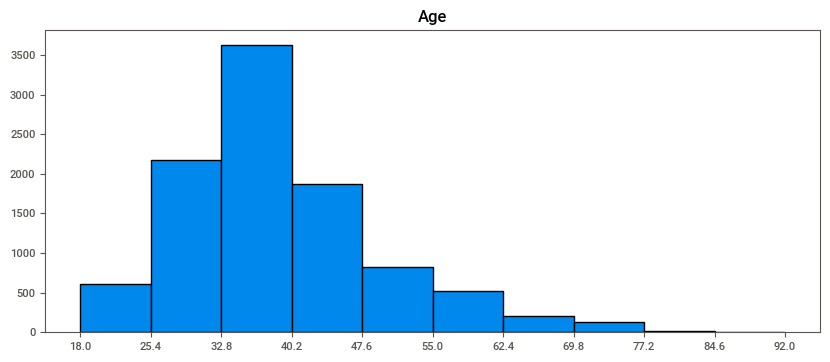

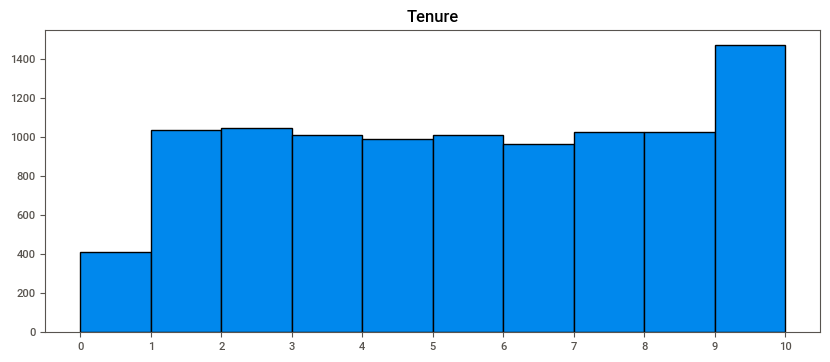

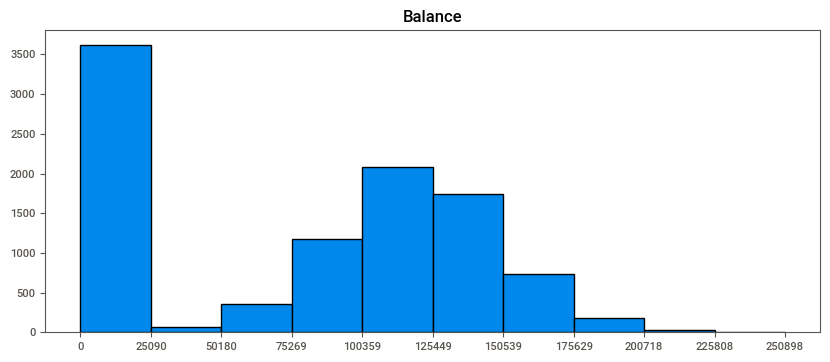

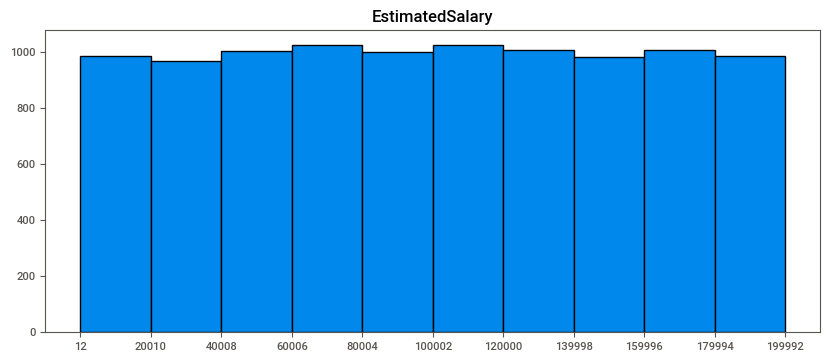

In [46]:
for col in num:
    fig,ax=plt.subplots(figsize=(10,4))
    n,bins,patches=plt.hist(df[col],edgecolor='black')
    plt.xticks(bins)
    plt.title(col)

<AxesSubplot: >

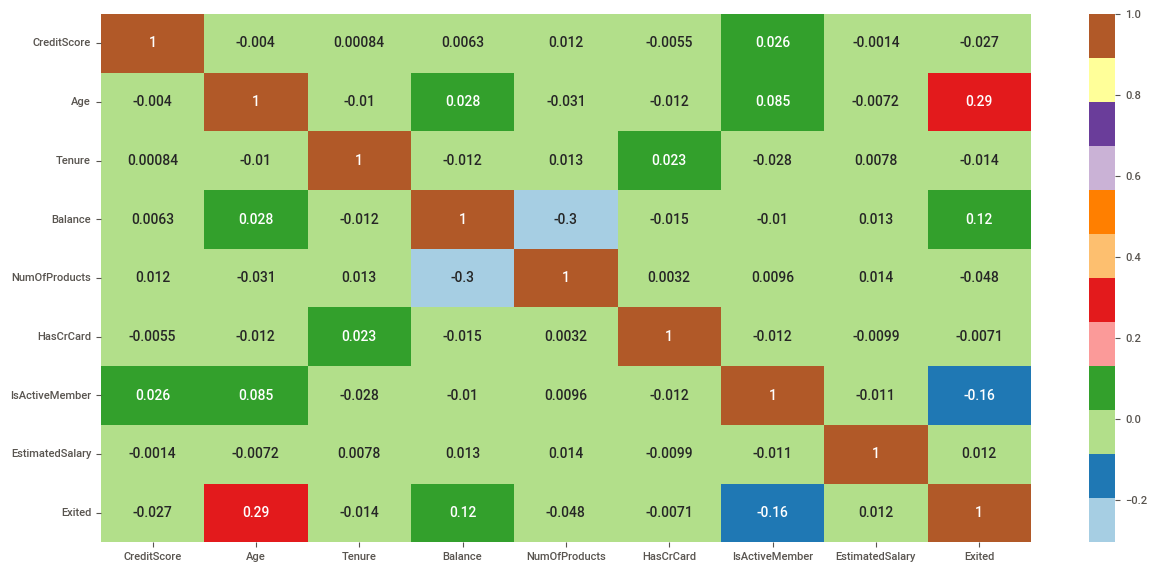

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Paired')

In [67]:
#LabelEncoding
encoder=preprocessing.LabelEncoder()
for col in ['Geography','Gender']:
    df[col]=encoder.fit_transform(df[col])

In [68]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [91]:
ind=df.drop('Exited',axis=1)
dep=df['Exited']

# Countering Data Imbalance by ADASYN over_sampling technique.

In [101]:
#!pip install -U imbalanced-learn

In [ ]:
def makeOS(a,b):
    from imblearn.over_sampling import ADASYN 
    sm = ADASYN()
    a_os,b_os= sm.fit_resample(a, b)
    return(a_os,b_os)

In [100]:
ind_os,dep_os=makeOS(ind,dep)

ind_os.shape,dep_os.shape

((15940, 10), (15940,))

In [95]:
dep_os.value_counts()

1    7977
0    7963
Name: Exited, dtype: int64

# Feature Selection

In [124]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(ind,dep,test_size=0.2,random_state=42)

In [96]:
x_ostrain,x_ostest,y_ostrain,y_ostest=model_selection.train_test_split(ind_os,dep_os,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [97]:
mutual_info = mutual_info_classif(x_ostrain, y_ostrain)
mutual_info

array([0.01563153, 0.0386595 , 0.05477756, 0.12636246, 0.01589897,
       0.01655566, 0.07827952, 0.01985486, 0.07218848, 0.01803579])

In [98]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Age                0.080916
NumOfProducts      0.073575
Geography          0.015339
CreditScore        0.009229
Balance            0.007809
IsActiveMember     0.005769
Tenure             0.004415
EstimatedSalary    0.003589
HasCrCard          0.001822
Gender             0.000000
dtype: float64

## mutual_info_classif aglorithm not giving clear results.

<BarContainer object of 10 artists>

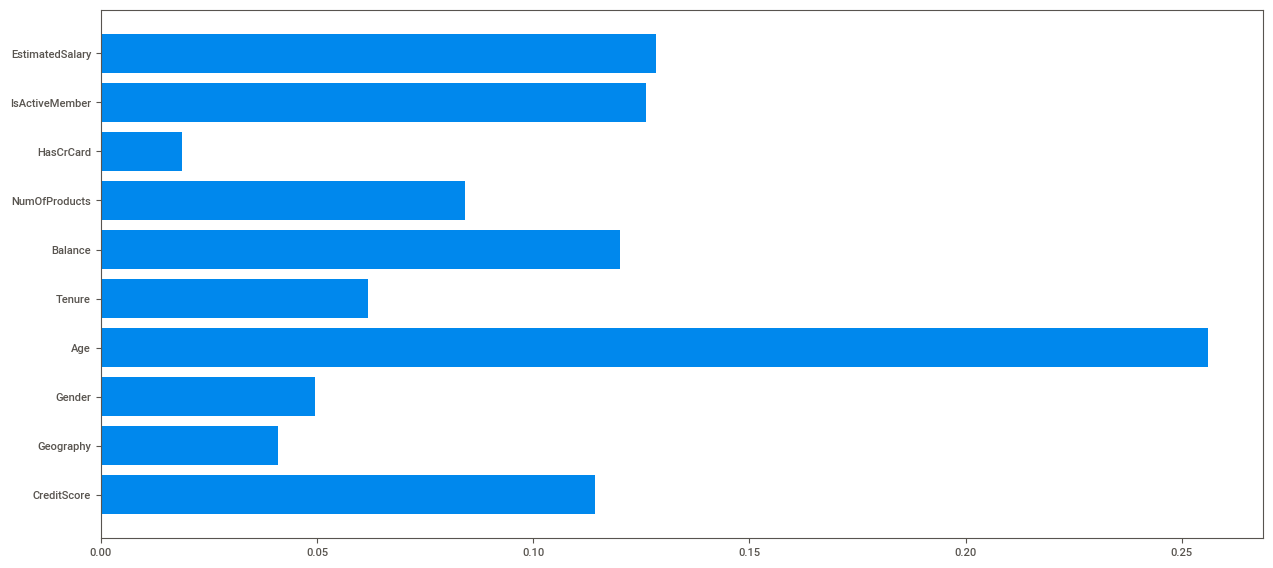

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_ostrain,y_ostrain)

plt.figure(figsize=(15,7))
plt.barh(x_ostrain.columns,rf.feature_importances_)

# Almost all the features have reasonable importance.

In [125]:
#Scaling
scaler=preprocessing.MinMaxScaler()
x_d_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_d_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
x_dos_train=pd.DataFrame(scaler.fit_transform(x_ostrain),columns=x_ostrain.columns)
x_dos_test=pd.DataFrame(scaler.fit_transform(x_ostest),columns=x_ostest.columns)

In [121]:
x_dos_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.633267,0.5,0.0,0.202703,0.4,0.581526,0.333333,1.0,0.0,0.344844
1,0.767535,0.0,0.0,0.297297,0.9,0.809594,0.000000,1.0,1.0,0.063589
2,0.659319,1.0,0.0,0.175676,0.9,0.548344,0.333333,1.0,1.0,0.505592
3,0.603206,0.5,1.0,0.378378,1.0,0.554010,0.666667,1.0,0.0,0.757477
4,0.631263,0.0,0.0,0.094595,0.1,0.721818,0.000000,0.0,0.0,0.187497


# SVC

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix

## For Balanced Data

In [112]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_dos_train,y_ostrain)

SVC()

In [120]:
confusion_matrix(y_ostest,svc_pred)

array([[1373,  230],
       [ 336, 1249]], dtype=int64)

In [116]:
print(classification_report(y_ostest,svc_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1603
           1       0.84      0.79      0.82      1585

    accuracy                           0.82      3188
   macro avg       0.82      0.82      0.82      3188
weighted avg       0.82      0.82      0.82      3188



## For Imbalanced Data

In [126]:
svc2=SVC()
svc2.fit(x_d_train,y_train)

SVC()

In [128]:
svc2_pred=svc2.predict(x_d_test)

In [129]:
confusion_matrix(y_test,svc2_pred)

array([[1581,   26],
       [ 271,  122]], dtype=int64)

In [130]:
print(classification_report(y_test,svc2_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.82      0.31      0.45       393

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000



## For imbalanced data, although the accuracy is good, the recall and f1_score are lower.

### Hyperparameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

In [136]:
svc_para={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['linear', 'poly', 'rbf']}
svc_grid=GridSearchCV(estimator=SVC(),param_grid=svc_para,verbose=2,cv=6)
svc_grid.fit(x_dos_train,y_ostrain)

Fitting 6 folds for each of 27 candidates, totalling 162 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.7s
[CV] END ........................C=0.1, gamma=1

[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   5.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   6.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   6.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   5.8s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   4.3s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   5.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   4.5s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   4.3s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   4.2s
[CV] END ...................

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [142]:
svc_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [144]:
svc_b=SVC(C=10,gamma=1,kernel='rbf')
svc_b.fit(x_dos_train,y_ostrain)

SVC(C=10, gamma=1)

In [145]:
svc_b_pred=svc_b.predict(x_dos_test)

In [146]:
print(classification_report(y_ostest,svc_b_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1603
           1       0.84      0.83      0.83      1585

    accuracy                           0.83      3188
   macro avg       0.83      0.83      0.83      3188
weighted avg       0.83      0.83      0.83      3188



In [149]:
svc_acc=accuracy_score(y_ostest,svc_b_pred)
svc_pre=precision_score(y_ostest,svc_b_pred)
svc_rec=recall_score(y_ostest,svc_b_pred)
svc_f1=f1_score(y_ostest,svc_b_pred)

In [151]:
print(svc_acc,svc_pre,svc_rec,svc_f1,sep='\n')

0.8346925972396487
0.8373724489795918
0.828391167192429
0.8328575959403742


# KNC

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_dos_train,y_ostrain)

KNeighborsClassifier()

In [153]:
knc_pred=knc.predict(x_dos_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [155]:
print(classification_report(y_ostest,knc_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1603
           1       0.80      0.82      0.81      1585

    accuracy                           0.81      3188
   macro avg       0.81      0.81      0.81      3188
weighted avg       0.81      0.81      0.81      3188



In [177]:
knc_acc=accuracy_score(y_ostest,knc_pred)
knc_pre=precision_score(y_ostest,knc_pred)
knc_rec=recall_score(y_ostest,knc_pred)
knc_f1=f1_score(y_ostest,knc_pred)

# Randomforest

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(oob_score=True)
rf.fit(x_dos_train,y_ostrain)

RandomForestClassifier(oob_score=True)

In [160]:
rf_pred=rf.predict(x_dos_test)

In [161]:
print(classification_report(y_ostest,rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1603
           1       0.85      0.80      0.82      1585

    accuracy                           0.83      3188
   macro avg       0.83      0.83      0.83      3188
weighted avg       0.83      0.83      0.83      3188



In [162]:
rf_para={'max_depth':[5,8,12],'criterion':["gini", "entropy"],'n_estimators':[25,50,100]}
rf_grid=GridSearchCV(estimator=rf,param_grid=rf_para,verbose=2,cv=4)
rf_grid.fit(x_dos_train,y_ostrain)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] END .......criterion=gini, max_depth=5, n_estimators=25; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END .......criterion=gini, max_depth=5, n_estimators=25; total time=   0.1s
[CV] END .......criterion=gini, max_depth=5, n_estimators=25; total time=   0.1s
[CV] END .......criterion=gini, max_depth=5, n_estimators=25; total time=   0.1s
[CV] END .......criterion=gini, max_depth=5, n_estimators=50; total time=   0.4s
[CV] END .......criterion=gini, max_depth=5, n_estimators=50; total time=   0.4s
[CV] END .......criterion=gini, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END .......criterion=gini, max_depth=5, n_estimators=50; total time=   0.4s
[CV] END ......criterion=gini, max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ......criterion=gini, max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ......criterion=gini, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END .......criterion=gini, max_depth=8, n_estimators=25; total time=   0.2s
[CV] END .......criterion=gi

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END ....criterion=entropy, max_depth=8, n_estimators=25; total time=   0.2s
[CV] END ....criterion=entropy, max_depth=8, n_estimators=50; total time=   0.7s
[CV] END ....criterion=entropy, max_depth=8, n_estimators=50; total time=   0.6s
[CV] END ....criterion=entropy, max_depth=8, n_estimators=50; total time=   0.5s
[CV] END ....criterion=entropy, max_depth=8, n_estimators=50; total time=   0.5s
[CV] END ...criterion=entropy, max_depth=8, n_estimators=100; total time=   1.1s
[CV] END ...criterion=entropy, max_depth=8, n_estimators=100; total time=   1.2s
[CV] END ...criterion=entropy, max_depth=8, n_estimators=100; total time=   1.1s
[CV] END ...criterion=entropy, max_depth=8, n_estimators=100; total time=   1.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV] END ...criterion=entropy, max_depth=12, n_estimators=25; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=25; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=25; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=25; total time=   0.3s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=50; total time=   0.7s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=50; total time=   0.7s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=50; total time=   0.7s
[CV] END ...criterion=entropy, max_depth=12, n_estimators=50; total time=   0.7s
[CV] END ..criterion=entropy, max_depth=12, n_estimators=100; total time=   1.5s
[CV] END ..criterion=entropy, max_depth=12, n_estimators=100; total time=   1.6s
[CV] END ..criterion=entropy, max_depth=12, n_estimators=100; total time=   1.5s
[CV] END ..criterion=entropy, max_depth=12, n_estimators=100; total time=   1.4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 12],
                         'n_estimators': [25, 50, 100]},
             verbose=2)

In [166]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 100}

In [167]:
rf_b=RandomForestClassifier(max_depth=12)
rf_b.fit(x_dos_train,y_ostrain)

RandomForestClassifier(max_depth=12)

In [168]:
rf_pred=rf_b.predict(x_dos_test)

In [169]:
print(classification_report(y_ostest,rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1603
           1       0.86      0.81      0.83      1585

    accuracy                           0.84      3188
   macro avg       0.84      0.84      0.84      3188
weighted avg       0.84      0.84      0.84      3188



In [176]:
rf_acc=accuracy_score(y_ostest,rf_pred)
rf_pre=precision_score(y_ostest,rf_pred)
rf_rec=recall_score(y_ostest,rf_pred)
rf_f1=f1_score(y_ostest,rf_pred)

# Stacking Classifier

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [199]:
base_m=[('dtc',DecisionTreeClassifier()),('knc',KNeighborsClassifier()),('svm',SVC(C=10,gamma=1,kernel='rbf')),
        ('gnb',GaussianNB()),('rf',RandomForestClassifier(max_depth=12))]
meta_m=LogisticRegression()
st=StackingClassifier(estimators=base_m,final_estimator=meta_m,cv=6)

In [200]:
st.fit(x_dos_train,y_ostrain)

StackingClassifier(cv=6,
                   estimators=[('dtc', DecisionTreeClassifier()),
                               ('knc', KNeighborsClassifier()),
                               ('svm', SVC(C=10, gamma=1)),
                               ('gnb', GaussianNB()),
                               ('rf', RandomForestClassifier(max_depth=12))],
                   final_estimator=LogisticRegression())

In [201]:
st_pred=st.predict(x_dos_test)

In [202]:
print(classification_report(y_ostest,st_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1603
           1       0.84      0.81      0.83      1585

    accuracy                           0.83      3188
   macro avg       0.83      0.83      0.83      3188
weighted avg       0.83      0.83      0.83      3188



In [203]:
st_acc=accuracy_score(y_ostest,st_pred)
st_pre=precision_score(y_ostest,st_pred)
st_rec=recall_score(y_ostest,st_pred)
st_f1=f1_score(y_ostest,st_pred)

In [204]:
compare={'Models':['SVC','KNC','RandomForest','StackingClass']
         ,'Accuracy':[svc_acc,knc_acc,rf_acc,st_acc]
        ,'Precision':[svc_pre,knc_pre,rf_pre,st_pre]
        ,'Recall':[svc_rec,knc_rec,rf_rec,st_rec]
        }
pd.DataFrame(compare)

,Models,Accuracy,Precision,Recall
0,SVC,0.834693,0.837372,0.828391
1,KNC,0.809598,0.798900,0.824606
2,RandomForest,0.836888,0.857623,0.805678
3,StackingClass,0.832811,0.843791,0.814511


# Conclusion
- SVC,RandomForest,StackingClass have the similar accuracy.
- Precision is a better metric for people churning out.
- RandomForest performs the best here.